In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import glob
import platform
import pathlib  
import os.path
import netCDF4 as nc
import geopandas as gpd
import rasterio
from rasterio.mask import mask


In [11]:
cwd = pathlib.Path().resolve()
src = cwd.parent
data = src.parent.parent.parent
OS_type = platform.system()

if OS_type == 'Darwin':
    username = 'Mats '
    data_path = os.path.join(data, 'data_tana', 'Sattelite')
else:
    username = 'Mootje'
    data_path = os.path.join(data, 'OneDrive - Delft University of Technology', 'TU Delft', 'Master ENVM', 'MDP', 'Model', 'Data', 'KMD')

print(f"Welcome {username}, have a wondeful day on your {OS_type} machine. Your data should be located in {data_path}")

Welcome Mootje, have a wondeful day on your Windows machine. Your data should be located in C:\Users\Moniek van Zon\OneDrive - Delft University of Technology\TU Delft\Master ENVM\MDP\Model\Data\KMD


In [21]:
data_files = glob.glob(os.path.join(data_path, 'rr_mrg_20180101_CLM.nc'))
data_files
datasets = {}

for file_path in data_files:
    # Extract the file identifier from the file name
    file_name = os.path.basename(file_path)  # Get just the file name
    file_identifier = file_name.split('_')[0]  # Split by underscore and take the first part
    # print(file_identifier)
    # Open the dataset
    dataset = xr.open_dataset(file_path)
    # print(dataset)
    # Add the file identifier as a new coordinate
    dataset = dataset.assign_coords(file_identifier=file_identifier)
    
    # Add the dataset to the dictionary with the file identifier as the key
    datasets[file_identifier] = dataset
    # print(datasets[file_identifier])
datasets['rr']

<xarray.Dataset> Size: 10kB
Dimensions:          (Lon: 64, Lat: 35)
Coordinates:
  * Lon              (Lon) float64 512B 36.58 36.62 36.68 ... 39.62 39.68 39.73
  * Lat              (Lat) float64 280B -1.225 -1.175 -1.125 ... 0.425 0.475
    file_identifier  <U2 8B 'rr'
Data variables:
    precip           (Lat, Lon) float32 9kB ...

<Axes: >

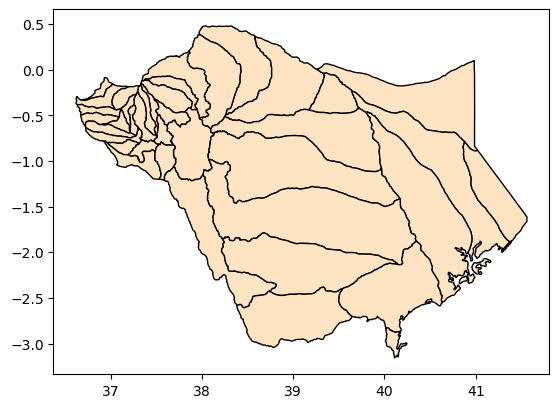

In [72]:
from shapely.geometry import Point

# plot the catchment area
shape_path = os.path.join(data, 'OneDrive - Delft University of Technology', 'TU Delft', 'Master ENVM', 'MDP', 'Model', 'Data', 'Shapefiles')
shape_file = os.path.join(shape_path, '*.gpkg')
shape_files = glob.glob(shape_file)
gdfs = []

for file in shape_files:
    gdf = gpd.read_file(file)
    gdfs.append(gdf)

merged_gdfs = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))
merged_gdfs.plot(color = 'bisque', edgecolor = 'black')
# plt.show()

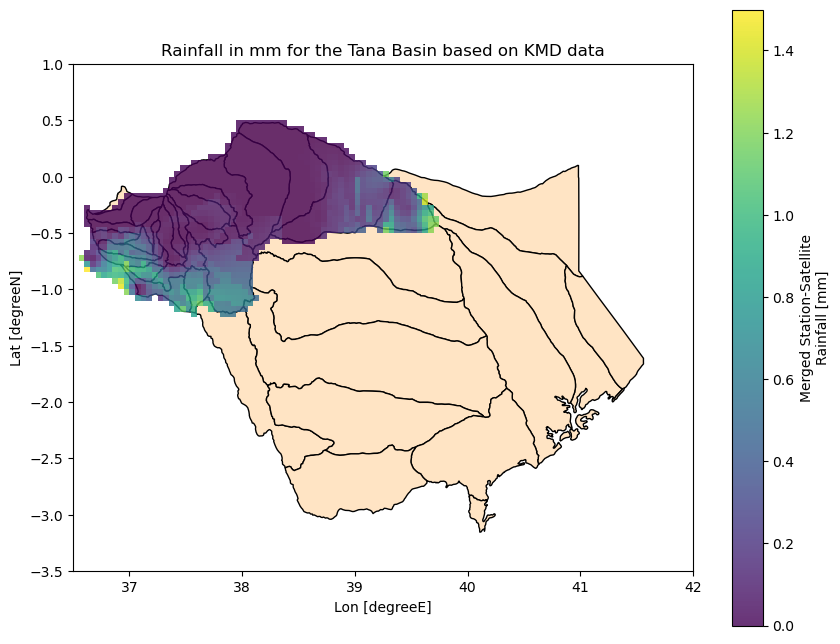

In [73]:
fig, ax = plt.subplots(figsize=(10, 8)) 
merged_gdfs.plot(ax=ax, color = 'bisque', edgecolor = 'black')
datasets['rr']['precip'].plot(x = 'Lon', y = 'Lat', cmap = 'viridis', alpha = 0.8)
ax.set_xlim(36.5, 42)
ax.set_ylim(-3.5, 1)
plt.title('Rainfall in mm for the Tana Basin based on KMD data')
plt.show()